In [22]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
data = make_blobs(centers=2)

blob = pd.DataFrame(data[0], columns=['x','y'])
blob_t = pd.DataFrame(data[1], columns=['target'])

blobs = pd.concat([blob, blob_t], axis=1)


blobs

# blobs.target.value_counts()

c0 = blobs[blobs.target==0]
c1 = blobs[blobs.target==1]

In [164]:
blobs

,x,y,target
0,5.886807,3.095753,1
1,5.082035,0.493262,1
2,6.254274,-3.688371,0
3,5.136182,2.051175,1
4,3.991233,0.629300,1
...,...,...,...
95,7.159755,0.986869,0
96,8.033889,0.408601,0
97,3.431194,1.257190,1
98,6.878183,-1.102707,0


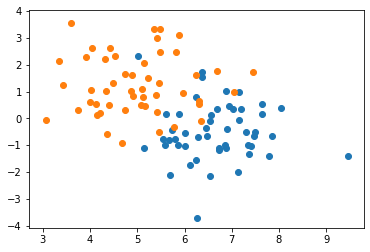

In [104]:
plt.scatter(c0.x, c0.y)
plt.scatter(c1.x, c1.y)

In [105]:
# c0.shape

In [106]:
# c1.shape

In [167]:
# 값이 너무 클경우 표준편차 기법을사용하여 성능을 높인다.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

 # 전처리 테스트
mm = MinMaxScaler()
#     ss = StandardScaler()
blobs = mm.fit_transform(blobs)
#     data_sc = ss.fit_transform(data.data)

# blobs[['x','y']].values
# blobs[['target']].values

array([0.44029973, 0.31433815, 0.49781507, 0.32281323, 0.14360779,
       1.        , 0.40671188, 0.5663634 , 0.49461615, 0.59836351,
       0.57107079, 0.37485564, 0.41548827, 0.15225783, 0.54270763,
       0.61740316, 0.41057885, 0.5924556 , 0.73706423, 0.        ,
       0.54098488, 0.36784976, 0.08100106, 0.33811532, 0.43617341,
       0.0426292 , 0.52861098, 0.28594039, 0.37296194, 0.6038016 ,
       0.36232004, 0.16425447, 0.22646276, 0.25978648, 0.71370696,
       0.30470056, 0.31765345, 0.32115869, 0.2204471 , 0.666985  ,
       0.74766147, 0.46096637, 0.25123096, 0.63601922, 0.42874711,
       0.45222339, 0.26008475, 0.3254971 , 0.42383574, 0.6787597 ,
       0.47671268, 0.53394516, 0.50354893, 0.21210619, 0.64638669,
       0.49717588, 0.51704716, 0.37559842, 0.51740816, 0.39626224,
       0.5066928 , 0.14983792, 0.6621625 , 0.28500054, 0.36643127,
       0.35828636, 0.49546776, 0.59664537, 0.19904884, 0.20284994,
       0.42769418, 0.16805707, 0.1331229 , 0.63779154, 0.68680

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

layer1 = Dense(10, input_shape=(2,), activation='relu')
# layer2 = Dense(1, activation='sigmoid') # 1 => sigmoid
layer2 = Dense(2, activation='softmax') # 2 => softmax

model.add(layer1)
model.add(layer2)

# model.summary()

# model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

# blobs[['x','y']].values
# blobs[['target']].values

model.fit(blobs[['x','y']].values, blobs[['target']].values, epochs=5)

/home/ai42/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [159]:
model.evaluate(blobs[['x','y']].values, blobs[['target']].values)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.41481258511543273, 0.79]

In [160]:
# when epochs 50
# [1.1195412111282348, 0.026666667]

# when epochs 5
# [-0.7987905240058899, 0.006666667]

In [161]:
import numpy as np

In [162]:
x = np.array([[8,2]], dtype='float32')

In [163]:
model.predict(x)

array([[0.15763442, 0.84236556]], dtype=float32)